In [22]:
import numpy as np
import pandas as pd
train1=pd.read_table('CMAPSSData/train_FD001.txt',delimiter=' ',header=None)

In [23]:
#drop useless columns
train1_tr=train1.drop([4,5,9,14,20,22,23,26,27],axis=1)
train1_tr.shape

(20631, 19)

In [27]:
c=np.zeros((24,24))
for i in range(24):
    for j in range(24):
        if c[i,j]==0:
            c[i,j]+=np.corrcoef(train1_tr[:,i],train1_tr[:,j])
        else:
            continue

InvalidIndexError: (slice(None, None, None), 0)

In [26]:
import seaborn as sns
sns.heatmap(np.corrcoef(train1_tr))

KeyboardInterrupt: 

In [3]:
#drop timestamps after 128 (for simplicity in this test case)
X=np.array(train1_tr)
condition=X[:,1]<=128
X_tr=X[condition]
X_tr.shape

(12800, 19)

In [4]:
#scale feature ranges
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_sc=scaler.fit_transform(X_tr[:,2:])

In [5]:
#vectorize each engine's data
X_t=np.zeros((100,2176))
for i in np.unique(X_tr[:,0].astype(int)):
    X_t[i-1]=X_sc[X_tr[:,0]==i].reshape(1,2176)

In [6]:
#let's run FPCA on X_t and look at the results

import matplotlib.pyplot as plt
import skfda
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
    FourierBasis,
    MonomialBasis,
)


In [339]:
f_data=skfda.FDataGrid(data_matrix=X_t, grid_points=np.linspace(0,2176,2176).astype(int))

In [340]:
fpca=FPCA(n_components=2) #we'll try k=2 just to visualize
comps=fpca.fit(f_data)

In [44]:
#y is RUL
y=np.zeros((100,))
for i in np.unique(X[:,0].astype(int)):
    y[i-1]=len(X[X[:,0]==i])
sc=MinMaxScaler()
y_sc=sc.fit_transform(y.reshape(-1,1))

In [42]:
from skfda.ml.regression import FPCARegression


In [372]:
ind=np.random.choice(100,85)
te_ind=np.delete(np.arange(100),ind)
x_tr=f_data[ind]
y_tr=y_sc[ind]
x_te=f_data[te_ind]
y_te=y_sc[te_ind]
logy_tr=np.log(y_tr+0.001)
logy_te=np.log(y_te+0.001)

In [373]:
l=[]
for i in np.linspace(10,70,7).astype(int):
    fpca1=FPCARegression(n_components=i)
    fpca1.fit(x_tr,logy_tr[:,0])
    l.append(fpca1.score(x_te,logy_te[:,0]))

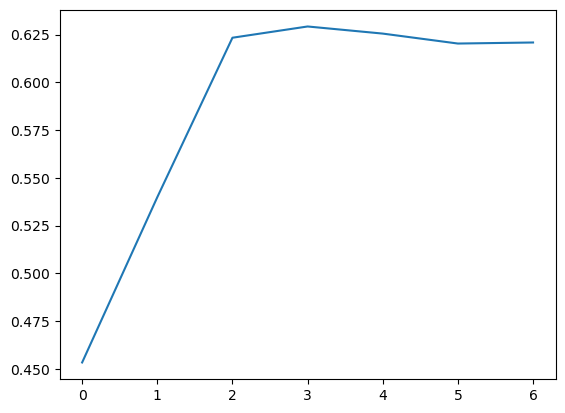

In [374]:
plt.plot(l) #why is this not better?

Text(0.5, 1.0, 'Multivariate FPCA k=50')

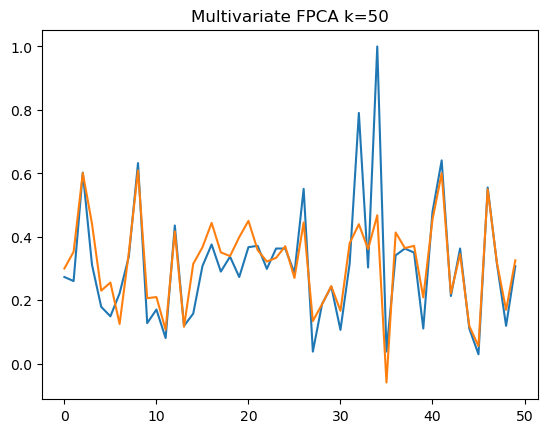

In [294]:
plt.plot(y_te[:,0])
plt.plot(fpcar.predict(x_te))
plt.title('Multivariate FPCA k=50')

In [288]:
r2_score(y_te[:,0],fpcar.predict(x_te))

0.6781404038403331

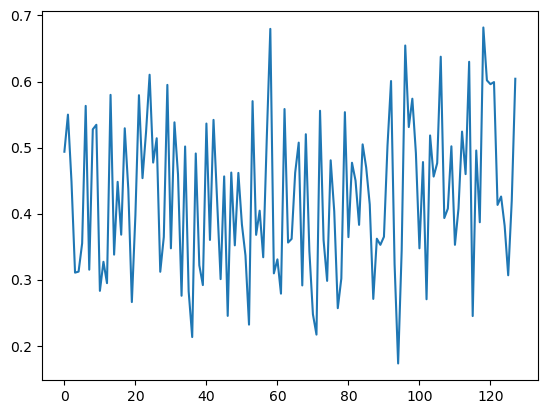

In [9]:
plt.plot(X_sc[:128,3]) #extremely noisy

In [26]:
import scipy.signal
from scipy.signal import butter, filtfilt


In [166]:
unfilt4=X_sc[:,3]
b, a = butter(N=3, Wn=0.5, btype='low')
filt4=filtfilt(b,a,unfilt3)

Text(0.5, 1.0, '3rd order, cutoff = 0.5')

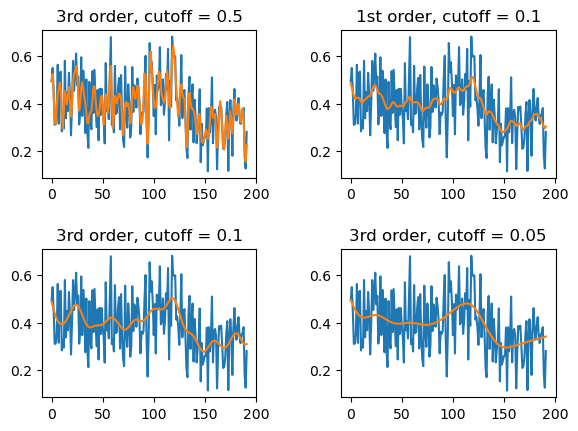

In [172]:
fig, axs = plt.subplots(2, 2)  # 2 rows, 2 columns
fig.tight_layout(pad=3.0)  # Add space between plots
axs[1,0].plot(unfilt[:192])
axs[1,0].plot(filt[:192])
axs[1,0].set_title('3rd order, cutoff = 0.1')

axs[0,1].plot(unfilt2[:192])
axs[0,1].plot(filt2[:192])
axs[0,1].set_title('1st order, cutoff = 0.1')

axs[1,1].plot(unfilt3[:192])
axs[1,1].plot(filt3[:192])
axs[1,1].set_title('3rd order, cutoff = 0.05')

axs[0,0].plot(unfilt4[:192])
axs[0,0].plot(filt4[:192])
axs[0,0].set_title('3rd order, cutoff = 0.5')



In [33]:
X_sc.shape

(12800, 17)

In [144]:
#low pass Butterworth 
X_t_filt=np.zeros((12800,17))
for i in range(X_sc.shape[1]): #columns
    b, a = butter(N=3, Wn=0.05, btype='low')
    X_t_filt[:,i]=filtfilt(b,a,X_sc[:,i]) #technically you should parse each engine run


In [145]:
#vectorize each engine's data
X_tr_filt=np.zeros((100,2176))
for i in np.unique(X_tr[:,0].astype(int)):
    X_tr_filt[i-1]=X_t_filt[X_tr[:,0]==i].reshape(1,2176)

In [152]:
#another stab at regression
np.random.seed(1)
f_data=skfda.FDataGrid(data_matrix=X_tr_filt, grid_points=np.linspace(0,2176,2176).astype(int))
ind=np.random.choice(100,70)
te_ind=np.delete(np.arange(100),ind)
x_tr=f_data[ind]
y_tr=y_sc[ind]
x_te=f_data[te_ind]
y_te=y_sc[te_ind]
loguns_tr=np.log(y[ind])
loguns_te=np.log(y[te_ind])
logy_tr=np.log(y_tr+0.001)
logy_te=np.log(y_te+0.001)

In [156]:
l=[]
for i in np.linspace(10,70,7).astype(int):
    fpca2=FPCARegression(n_components=i)
    fpca2.fit(x_tr,logy_tr[:,0])
    l.append(fpca2.score(x_te,logy_te[:,0]))

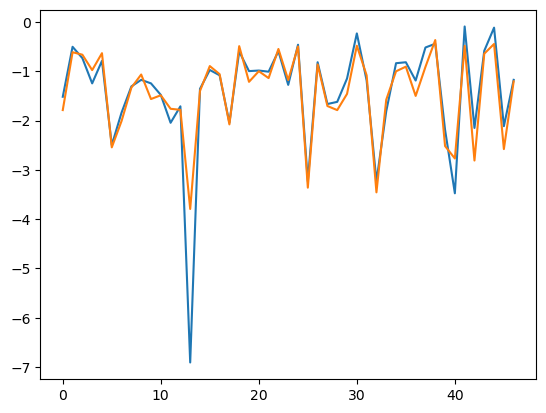

In [149]:
plt.plot(logy_te[:,0])
plt.plot(fpca2.predict(x_te))

In [178]:
fpca=FPCA(n_components=3) #we'll try k=2 just to visualize
comps=fpca.fit(f_data)

Text(0.5, 1.0, '3 Functional Principal Components')

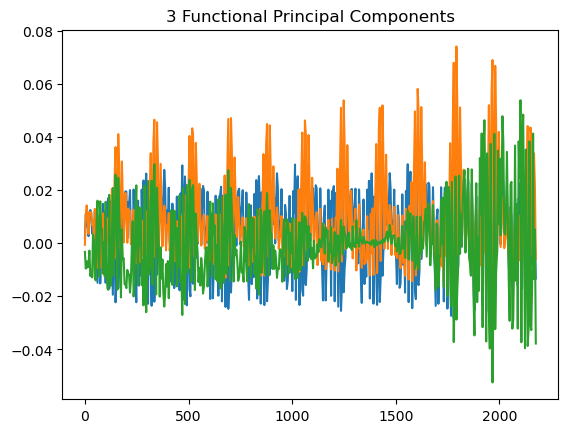

In [180]:
comps.components_.plot()
plt.title('3 Functional Principal Components')
#in this plot, we are seeing cross sections of the features over time
#it looks like one of the components picks up on a growth element later in the cycle

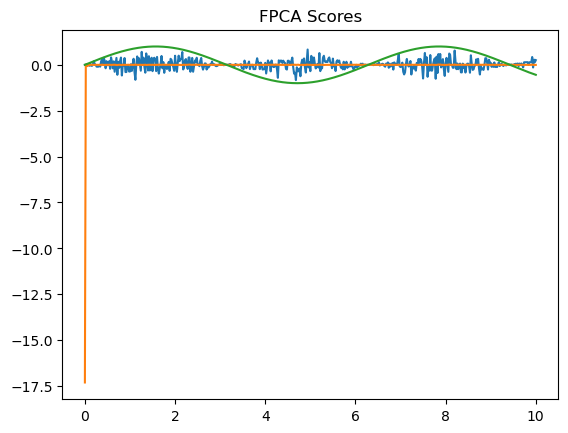

In [21]:
import numpy as np
from skfda import FDataGrid
from skfda.preprocessing.dim_reduction.projection import FPCA

# Generating some synthetic functional data
# Let's assume we have 100 functions (observations) each defined over 50 points
n_observations = 200
n_points = 1000
time_points = np.linspace(0, 10, n_points)
data = np.array([np.sin(time_points)  for _ in range(n_observations)])

# Creating an FDataGrid object, which is the input for FPCA in skfda
fd = FDataGrid(data, grid_points=time_points)

# Performing FPCA
fpca = FPCA(n_components=2)  # Let's extract the first two principal components
fpca.fit(fd)
fd_transformed = fpca.transform(fd)

# fd_transformed contains the scores of each observation on the principal components
# You can access the principal component functions themselves via fpca.components_

# To visualize the first two principal components
fpca.components_.plot()

# To visualize the scores of the observations on the first two principal components
import matplotlib.pyplot as plt
plt.plot(time_points, data[0])
plt.title('FPCA Scores')
plt.show()


In [17]:
fpca.explained_variance_ratio_

array([1.00000000e+00, 1.39334634e-32])